## Visualizing Titanic Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
# 
# Install library
!pip install openpyxl
# 
# Load data
titanic = pd.read_excel('../data/titanic.xlsx')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,body,boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO",NaN,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",NaN,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",NaN,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",135.0,NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",NaN,NaN


In [15]:
# 
# Show the structure of the DataFrame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home.dest  745 non-null    object 
 12  body       121 non-null    float64
 13  boat       486 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [16]:
# 
# Which columns contain null values and how many missing values are in each
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
home.dest     564
body         1188
boat          823
dtype: int64

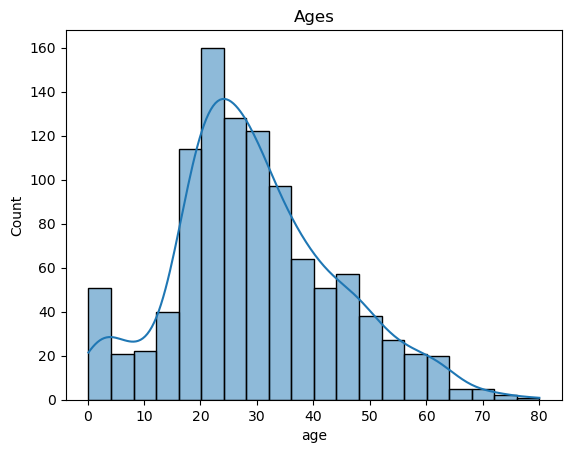

In [18]:
# 
# How should we handle the missing age values? mean median or based on passenger class (parch)?
# 
# Determine whether the age column has a normal distribution and has no extreme outliers (check using box plot)
# 
# Plot a histogram and add a KDE plot (to check for normal distriibution)
sns.histplot(titanic['age'], bins = 20, kde = True)
plt.title('Ages')
plt.show()


In [28]:
# 
# Since the age column doesn't have a perfect nonrmal distribution and no extreme outliers, we impute it using median values based on the passenger class
# 
# Make a copy of the DataFrame
titanic_copy = titanic.copy()
titanic['age'] = titanic.groupby('pclass')['age'].transform(lambda x: x.fillna(x.median()))
titanic['age'].isnull().sum()

np.int64(0)

In [31]:
# 
# Since the cabin, boat, and body columns have many null values, we can drop them
# 
# axis = 1 tells Pandas you're dropping a column and axis = 0 tells Pandas you're dropping a row
titanic.drop(['cabin', 'body', 'boat'], axis = 1, inplace = True)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,24.0000,1,0,2665,14.4542,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,NaN


In [32]:
# 
# Also delete the rows with null values in the embarked and row columns since they are negligeble
titanic = titanic[~(titanic['embarked'].isna() | titanic['fare'].isna())]
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,24.0000,1,0,2665,14.4542,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,NaN


In [33]:
titanic.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
home.dest    562
dtype: int64